In [1]:
import pandas as pd
import os
from unicodedata import normalize
import re
import math as m
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import matplotlib.colors as mcolors

In [3]:
dict_regiones2 = {
    1:'Tarapacá',
    2:'Antofagasta',
    3:'Atacama',
    4:'Coquimbo',
    5:'Valparaíso',
    6:'''O'Higgins''' ,
    7:'Maule',
    8:'Biobio',
    9:'La Araucania',
    10:'Los Lagos',
    11:'Aysen',
    12:'Magallanes',
    13:'Metropolitana',
    14:'Los Rios',
    15:'Arica y Parinacota',
    16:'Ñuble'
}


In [4]:
path01 = 'your_path'
path02 = 'your_path'
path03 = 'your_path'
path04 = 'your_path'
path_plot = path04+'generated/'


In [6]:
dft = pd.read_csv(path01+'generated/all_travel_scenarios_definidos.csv')
dft.columns

Index(['Unnamed: 0', 'region_origin_code', 'region_destination_code',
       'travel_scenario_2', 'date_scenario_2', 'travel_scenario_3',
       'date_scenario_3', 'travel_scenario_sim', 'date_scenario_sim'],
      dtype='object')

In [8]:
dft2 = dft[['region_origin_code','region_destination_code','travel_scenario_2','travel_scenario_3','travel_scenario_sim']].groupby(['region_origin_code','region_destination_code']).sum().reset_index().copy()
dft2['origin'] = dft2.region_origin_code.map(dict_regiones2)
dft2['destination'] = dft2.region_destination_code.map(dict_regiones2)
dft2

,region_origin_code,region_destination_code,travel_scenario_2,travel_scenario_3,travel_scenario_sim,origin,destination
0,1,2,2924.0,2613.0,7080.0,Tarapacá,Antofagasta
1,1,3,150.0,139.0,422.0,Tarapacá,Atacama
2,1,4,53.0,30.0,328.0,Tarapacá,Coquimbo
3,1,5,49.0,44.0,382.0,Tarapacá,Valparaíso
4,1,6,15.0,8.0,70.0,Tarapacá,O'Higgins
...,...,...,...,...,...,...,...
235,16,11,0.0,2.0,20.0,Ñuble,Aysen
236,16,12,2.0,1.0,28.0,Ñuble,Magallanes
237,16,13,1880.0,1373.0,8857.0,Ñuble,Metropolitana
238,16,14,157.0,182.0,434.0,Ñuble,Los Rios


In [12]:
dft3 = dft[['region_origin_code','region_destination_code','travel_scenario_2','travel_scenario_3','travel_scenario_sim']].groupby(['region_origin_code','region_destination_code']).sum().reset_index().copy()
dft3 = dft3.append(pd.DataFrame({'region_origin_code':[i for i in dft3.region_origin_code.unique()],'region_destination_code':[i for i in dft3.region_origin_code.unique()],
              'travel_scenario_2':[0 for i in dft3.region_origin_code.unique()],'travel_scenario_3':[0 for i in dft3.region_origin_code.unique()],
              'travel_scenario_sim':[0 for i in dft3.region_origin_code.unique()],
              'origin':[0 for i in dft3.region_origin_code.unique()],'destination':[0 for i in dft3.region_origin_code.unique()]}))
dft3['origin'] = dft3.region_origin_code.map(dict_regiones2)
dft3['destination'] = dft3.region_destination_code.map(dict_regiones2)
dft3 = dft3.sort_values(by=['region_origin_code','region_destination_code']).reset_index(drop=True)
dft3

xxxxxx6dj8z11hbw43hv0r0000gn/T/ipykernel_2191/2202353714.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dft3 = dft3.append(pd.DataFrame({'region_origin_code':[i for i in dft3.region_origin_code.unique()],'region_destination_code':[i for i in dft3.region_origin_code.unique()],


,region_origin_code,region_destination_code,travel_scenario_2,travel_scenario_3,travel_scenario_sim,origin,destination
0,1,1,0.0,0.0,0.0,Tarapacá,Tarapacá
1,1,2,2924.0,2613.0,7080.0,Tarapacá,Antofagasta
2,1,3,150.0,139.0,422.0,Tarapacá,Atacama
3,1,4,53.0,30.0,328.0,Tarapacá,Coquimbo
4,1,5,49.0,44.0,382.0,Tarapacá,Valparaíso
...,...,...,...,...,...,...,...
251,16,12,2.0,1.0,28.0,Ñuble,Magallanes
252,16,13,1880.0,1373.0,8857.0,Ñuble,Metropolitana
253,16,14,157.0,182.0,434.0,Ñuble,Los Rios
254,16,15,1.0,0.0,3.0,Ñuble,Arica y Parinacota


# Travel Plots

# Reordenada

In [17]:
def make_colormap(seq):
    """Return a LinearSegmentedColormap
    seq: a sequence of floats and RGB-tuples. The floats should be increasing
    and in the interval (0,1).
    """
    seq = [(None,) * 3, 0.0] + list(seq) + [1.0, (None,) * 3]
    cdict = {'red': [], 'green': [], 'blue': []}
    for i, item in enumerate(seq):
        if isinstance(item, float):
            r1, g1, b1 = seq[i - 1]
            r2, g2, b2 = seq[i + 1]
            cdict['red'].append([item, r1, r2])
            cdict['green'].append([item, g1, g2])
            cdict['blue'].append([item, b1, b2])
    return mcolors.LinearSegmentedColormap('CustomMap', cdict)

c = mcolors.ColorConverter().to_rgb
rvb = make_colormap([c('white'), c('#456D9B')])#4DC8BB

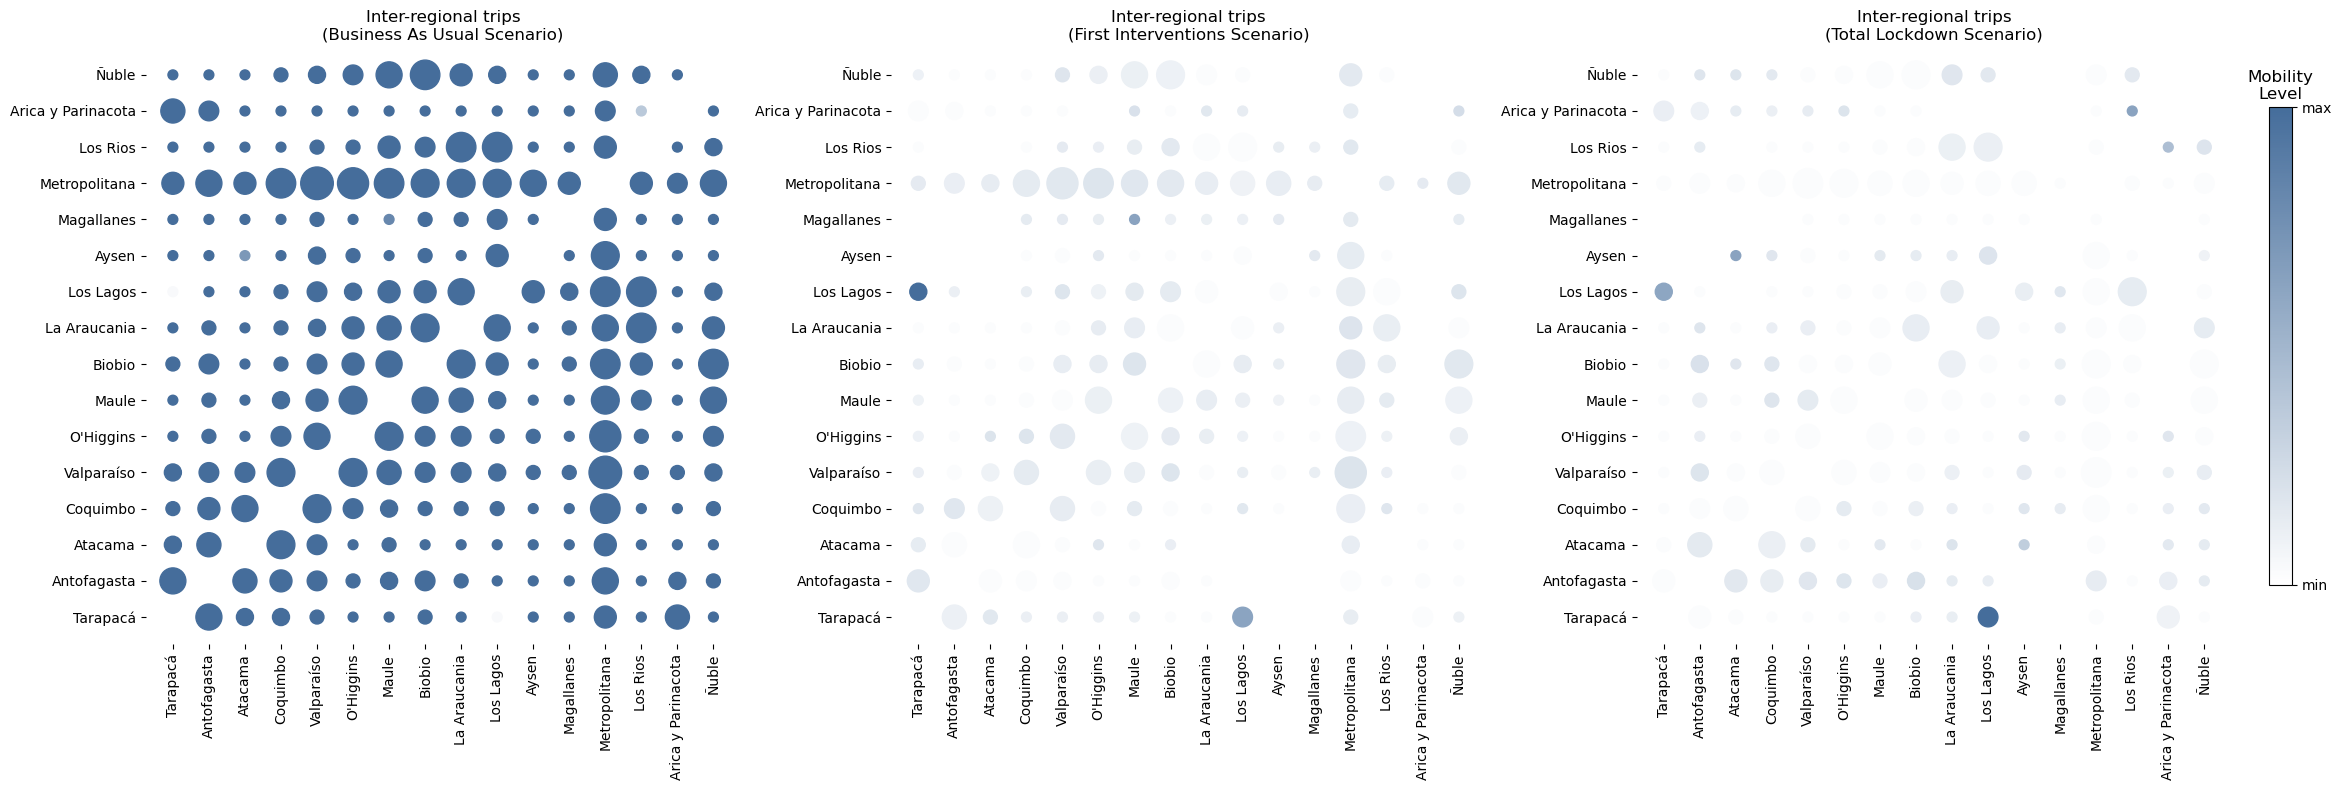

In [24]:
#Reordenada
fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(24,8),gridspec_kw={'width_ratios': [1, 1,1.25]})#36,10
axes = axes.flatten()

ax = axes[0]
ax.scatter(dft3.region_origin_code,dft3.region_destination_code,s=dft3.sizes_sim,c=dft3.alphas,cmap=rvb)
ax.set_xticks(range(1,17))
ax.set_xticklabels(dft3.origin.unique().tolist()[:-1])
ax.set_yticks(range(1,17))
ax.set_yticklabels(dft3.origin.unique().tolist()[:-1])
ax.set_title('Inter-regional trips\n(Business As Usual Scenario)')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.xaxis.set_tick_params(rotation=90)

ax = axes[1]
ax.scatter(dft3.region_origin_code,dft3.region_destination_code,s=dft3.sizes_2,c=dft3.alpha2x,cmap=rvb)
ax.set_xticks(range(1,17))
ax.set_xticklabels(dft3.origin.unique().tolist()[:-1])
ax.set_yticks(range(1,17))
ax.set_yticklabels(dft3.origin.unique().tolist()[:-1])
ax.set_title('Inter-regional trips\n(First Interventions Scenario)')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.xaxis.set_tick_params(rotation=90)

ax = axes[2]
#ax.set_aspect(1)
mapp = ax.scatter(dft3.region_origin_code,dft3.region_destination_code,s=dft3.sizes_3,c=dft3.alpha3x,cmap=rvb)
ax.set_xticks(range(1,17))
ax.set_xticklabels(dft3.origin.unique().tolist()[:-1])
ax.set_yticks(range(1,17))
ax.set_yticklabels(dft3.origin.unique().tolist()[:-1])
ax.set_title('Inter-regional trips\n(Total Lockdown Scenario)')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.xaxis.set_tick_params(rotation=90)


cbar = fig.colorbar(mapp,ticks=[0,1.6], shrink=0.8)
cbar.ax.set_yticklabels(['min','max'])
cbar.ax.set_title('Mobility\nLevel')

fig.tight_layout()
#fig.savefig(path_plot+'mobility_level_reg_h.png',facecolor='white',dpi=600, bbox_inches="tight")